In [1]:
import sys
sys.path.append("..")

In [2]:
import torch

from src.datikz_data import DatikzCaptionDataset, collate_fn
from src.utils import load_model, generate_captions

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_path = "/taiga/LLaVa-FT-datikz/outputs/llava-datikz-lora/llava-datikz-full"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, processor = load_model(model_path)
model = model.to(device)
model.eval()

[info] Loading model from '/taiga/LLaVa-FT-datikz/outputs/llava-datikz-lora/llava-datikz-full' to device cuda:0...


Loading checkpoint shards: 100%|██████████| 3/3 [00:12<00:00,  4.30s/it]
Using `use_fast=True` but `torchvision` is not available. Falling back to the slow image processor.


[info] Loading processor (use_fast=True)...
✅ Model and processor loaded successfully!


LlavaForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPSdpaAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): Q

In [4]:
dataset = DatikzCaptionDataset(split="test")

✅ DatikzCaptionDataset initialized with 4830 samples for split 'test'


In [5]:
sample_idx = 0

image = dataset[sample_idx]["image"]
label = dataset[sample_idx]["caption"]

In [7]:
preds = generate_captions(model, processor, image, device)

print(preds)

['USER:  \nPlease describe this image. ASSISTANT: The process of learning a new task. The task is initially unknown, and the agent learns it through trial and error. The agent starts with an initial guess, and then updates its beliefs based on the observed outcomes. The agent continues to learn until it reaches a satisfactory level of performance. The process is iterative, and the agent continues to learn until it reaches a satisfactory level of performance. The agent starts with an initial guess, and then updates its beliefs based on the observed outcomes. The agent continues to learn until it reaches a satisfactory level of performance. The process is iterative, and the agent']


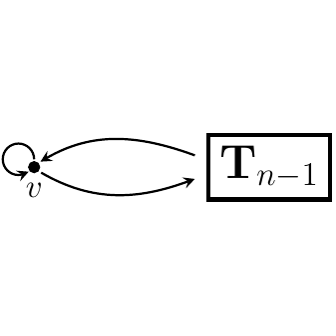

In [8]:
image